# Wine Quality Analysis 

# Config Notebook

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from scipy import stats 
import pingouin as pg

# import pyarrow as pa

In [34]:
# config packages
pd.options.mode.copy_on_write = "warn"

In [35]:
# load project config
with open("../config/config.yaml", "r") as file:
    config = yaml.safe_load(file)
config

{'data_path_wine_red': 'data/wine+quality/winequality-red.csv',
 'data_path_wine_white': 'data/wine+quality/winequality-white.csv'}

In [36]:
# useful constants
all_inputs = [
    'ph', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
    'chlorides', 
    'total_sulfur_dioxide', 'free_sulfur_dioxide', 'sulphates',
    'residual_sugar',
    'density',
    'alcohol'
    ]

all_columns = [
    'ph', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
    'chlorides', 
    'total_sulfur_dioxide', 'free_sulfur_dioxide', 'sulphates',
    'residual_sugar',
    'density',
    'alcohol',
    'quality'
]

# Import and build data frame

In [106]:
# NOTE - Keep two data frames if data is actually separate
# TODO - how to build paths in python
# TODO - work with config

# wine data
# wine_r = pd.read_parquet('../' + config['data_path_wine_red'], sep=';')
# wine_w = pd.read_parquet('../' + config['data_path_wine_white'], sep=';')
wine_w = pd.read_parquet('../data/processed/wine_w_orig.parquet')
wine_r = pd.read_parquet('../data/processed/wine_r_orig.parquet')
wine   = pd.read_parquet('../data/processed/wine_orig.parquet')

# normalized wine data
wine_w_norm = pd.read_parquet('../data/processed/wine_w_norm.parquet')
wine_r_norm = pd.read_parquet('../data/processed/wine_r_norm.parquet')
wine_norm = pd.read_parquet('../data/processed/wine_norm.parquet')

In [38]:
wine_w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3746 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ph                    3746 non-null   float64 
 1   fixed_acidity         3746 non-null   float64 
 2   volatile_acidity      3746 non-null   float64 
 3   citric_acid           3746 non-null   float64 
 4   chlorides             3746 non-null   float64 
 5   total_sulfur_dioxide  3746 non-null   float64 
 6   free_sulfur_dioxide   3746 non-null   float64 
 7   sulphates             3746 non-null   float64 
 8   residual_sugar        3746 non-null   float64 
 9   density               3746 non-null   float64 
 10  alcohol               3746 non-null   float64 
 11  quality               3746 non-null   int64   
 12  color                 3746 non-null   category
 13  quality_label         3746 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 388.0 KB


In [39]:
wine_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ph                    1359 non-null   float64 
 1   fixed_acidity         1359 non-null   float64 
 2   volatile_acidity      1359 non-null   float64 
 3   citric_acid           1359 non-null   float64 
 4   chlorides             1359 non-null   float64 
 5   total_sulfur_dioxide  1359 non-null   float64 
 6   free_sulfur_dioxide   1359 non-null   float64 
 7   sulphates             1359 non-null   float64 
 8   residual_sugar        1359 non-null   float64 
 9   density               1359 non-null   float64 
 10  alcohol               1359 non-null   float64 
 11  quality               1359 non-null   int64   
 12  color                 1359 non-null   category
 13  quality_label         1359 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 140.9 KB


# EDA

## Describe

In [40]:
wine_r.describe()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,3.309787,8.310596,0.529478,0.272333,0.088124,46.825975,15.893304,0.658705,2.523400,0.996709,10.432315,5.623252
std,0.155036,1.736990,0.183031,0.195537,0.049377,33.408946,10.447270,0.170667,1.352314,0.001869,1.082065,0.823578
min,2.740000,4.600000,0.120000,0.000000,0.012000,6.000000,1.000000,0.330000,0.900000,0.990070,8.400000,3.000000
25%,3.210000,7.100000,0.390000,0.090000,0.070000,22.000000,7.000000,0.550000,1.900000,0.995600,9.500000,5.000000
50%,3.310000,7.900000,0.520000,0.260000,0.079000,38.000000,14.000000,0.620000,2.200000,0.996700,10.200000,6.000000
75%,3.400000,9.200000,0.640000,0.430000,0.091000,63.000000,21.000000,0.730000,2.600000,0.997820,11.100000,6.000000
max,4.010000,15.900000,1.580000,1.000000,0.611000,289.000000,72.000000,2.000000,15.500000,1.003690,14.900000,8.000000


In [41]:
wine_w.describe()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
count,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000
mean,3.196770,6.829351,0.278397,0.332365,0.045546,131.791111,33.706220,0.488241,5.664909,0.993608,10.650226,5.877469
std,0.151991,0.871342,0.102558,0.121128,0.022635,37.316416,15.836893,0.114540,4.763111,0.002839,1.212802,0.894242
min,2.720000,3.800000,0.080000,0.000000,0.009000,9.000000,2.000000,0.220000,0.600000,0.987110,8.000000,3.000000
25%,3.100000,6.300000,0.210000,0.270000,0.035000,105.000000,22.000000,0.410000,1.600000,0.991500,9.600000,5.000000
50%,3.190000,6.800000,0.260000,0.320000,0.042000,130.000000,32.000000,0.470000,4.400000,0.993300,10.500000,6.000000
75%,3.290000,7.300000,0.320000,0.380000,0.050000,160.000000,44.000000,0.550000,8.400000,0.995450,11.500000,6.000000
max,3.820000,14.200000,1.100000,1.660000,0.346000,210.000000,124.000000,1.080000,65.800000,1.038980,14.200000,9.000000


### Primary Observations from describe
 - Acidity levels
   - The mean value of fixed, volatile acidity and pH seem to be higher in red wine.
   - Citric acidity is higher in white wines.
   - white wine is slightly lower in ph, i.e. more acidic, than red wine. 
 - chlorides are higher in red wines.
 - sulfur dioxide and sulphates
   - free and total sulfur dioxide is higher in white wines.
   - The mean value of sulphates seem to be higher in red wine compared to white wine.
 - residual sugar is higher in white wines, but it also varies quite strongly.
 - Density is similar.
 - alcohol content is similar in red and white wine.
 - quality rating is similar, there is one exceptional white wine.

In [42]:
wine_r.quality.value_counts().sort_index()

quality
3     10
4     53
5    577
6    535
7    167
8     17
Name: count, dtype: int64

In [43]:
wine_w.quality.value_counts().sort_index()

quality
3      15
4     147
5    1079
6    1686
7     684
8     130
9       5
Name: count, dtype: int64

## Correlations

In [44]:
corr_w = wine_w.corr(numeric_only=True)
corr_w

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.430543,-0.037870,-0.171578,-0.082261,0.032125,-0.008009,0.150084,-0.148466,-0.046109,0.080892,0.124728
fixed_acidity,-0.430543,1.000000,-0.026959,0.303949,0.012076,0.067025,-0.070463,-0.030019,0.062574,0.256298,-0.107196,-0.126223
volatile_acidity,-0.037870,-0.026959,1.000000,-0.189580,0.057725,0.066560,-0.142174,-0.038060,0.078651,0.032673,0.075996,-0.176806
citric_acid,-0.171578,0.303949,-0.189580,1.000000,0.135772,0.105628,0.089476,0.041514,0.083663,0.147407,-0.068027,0.017763
chlorides,-0.082261,0.012076,0.057725,0.135772,1.000000,0.197119,0.113852,0.007215,0.064395,0.250554,-0.366322,-0.213506
total_sulfur_dioxide,0.032125,0.067025,0.066560,0.105628,0.197119,1.000000,0.593333,0.112408,0.373877,0.502548,-0.416995,-0.144553
free_sulfur_dioxide,-0.008009,-0.070463,-0.142174,0.089476,0.113852,0.593333,1.000000,0.029049,0.295011,0.266566,-0.221298,0.071387
sulphates,0.150084,-0.030019,-0.038060,0.041514,0.007215,0.112408,0.029049,1.000000,-0.041439,0.062197,-0.008582,0.067996
residual_sugar,-0.148466,0.062574,0.078651,0.083663,0.064395,0.373877,0.295011,-0.041439,1.000000,0.808423,-0.371181,-0.103703
density,-0.046109,0.256298,0.032673,0.147407,0.250554,0.502548,0.266566,0.062197,0.808423,1.000000,-0.752621,-0.332974


In [45]:
corr_r = wine_r.corr(numeric_only=True)
corr_r

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.686685,0.247111,-0.550310,-0.270893,-0.079257,0.056631,-0.214134,-0.083143,-0.355617,0.213418,-0.055245
fixed_acidity,-0.686685,1.000000,-0.255124,0.667437,0.085886,-0.103777,-0.140580,0.190269,0.111025,0.670195,-0.061596,0.119024
volatile_acidity,0.247111,-0.255124,1.000000,-0.551248,0.055154,0.071701,-0.020945,-0.256948,-0.002449,0.023943,-0.197812,-0.395214
citric_acid,-0.550310,0.667437,-0.551248,1.000000,0.210195,0.047358,-0.048004,0.326062,0.143892,0.357962,0.105108,0.228057
chlorides,-0.270893,0.085886,0.055154,0.210195,1.000000,0.045773,0.000749,0.394557,0.026656,0.193592,-0.223824,-0.130988
total_sulfur_dioxide,-0.079257,-0.103777,0.071701,0.047358,0.045773,1.000000,0.667246,0.035291,0.201038,0.078141,-0.217829,-0.177855
free_sulfur_dioxide,0.056631,-0.140580,-0.020945,-0.048004,0.000749,0.667246,1.000000,0.054126,0.160527,-0.018071,-0.080125,-0.050463
sulphates,-0.214134,0.190269,-0.256948,0.326062,0.394557,0.035291,0.054126,1.000000,-0.011837,0.146036,0.091621,0.248835
residual_sugar,-0.083143,0.111025,-0.002449,0.143892,0.026656,0.201038,0.160527,-0.011837,1.000000,0.324522,0.063281,0.013640
density,-0.355617,0.670195,0.023943,0.357962,0.193592,0.078141,-0.018071,0.146036,0.324522,1.000000,-0.504995,-0.184252


In [46]:
# sns.pairplot(wine_r)

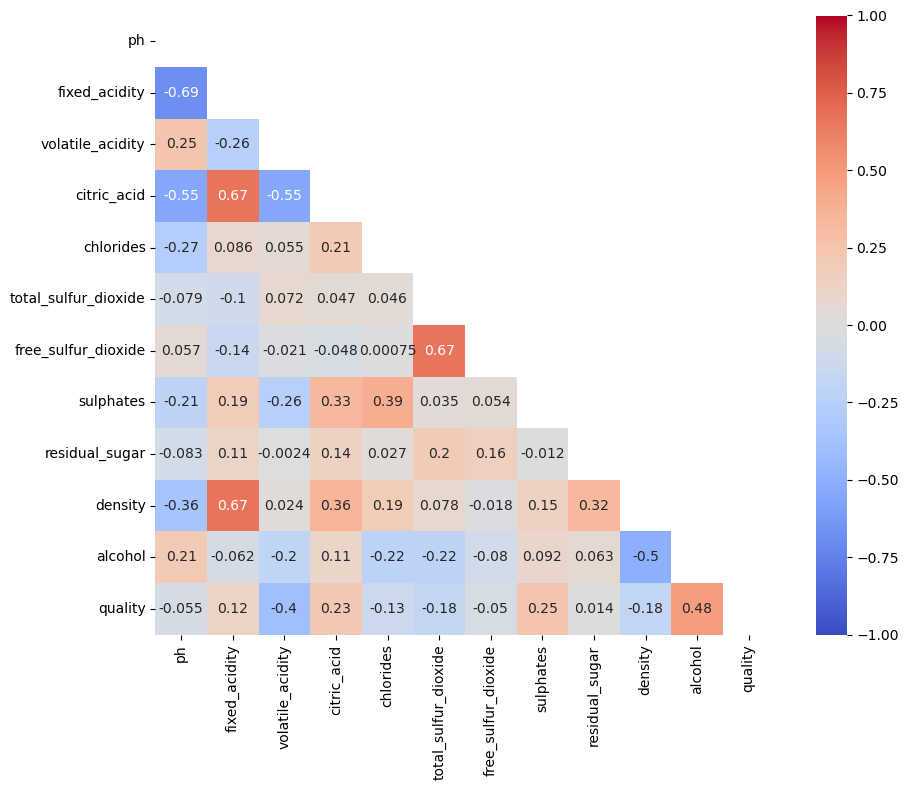

In [47]:
f, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_r, dtype=bool))

sns.heatmap(corr_r, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

plt.tight_layout()

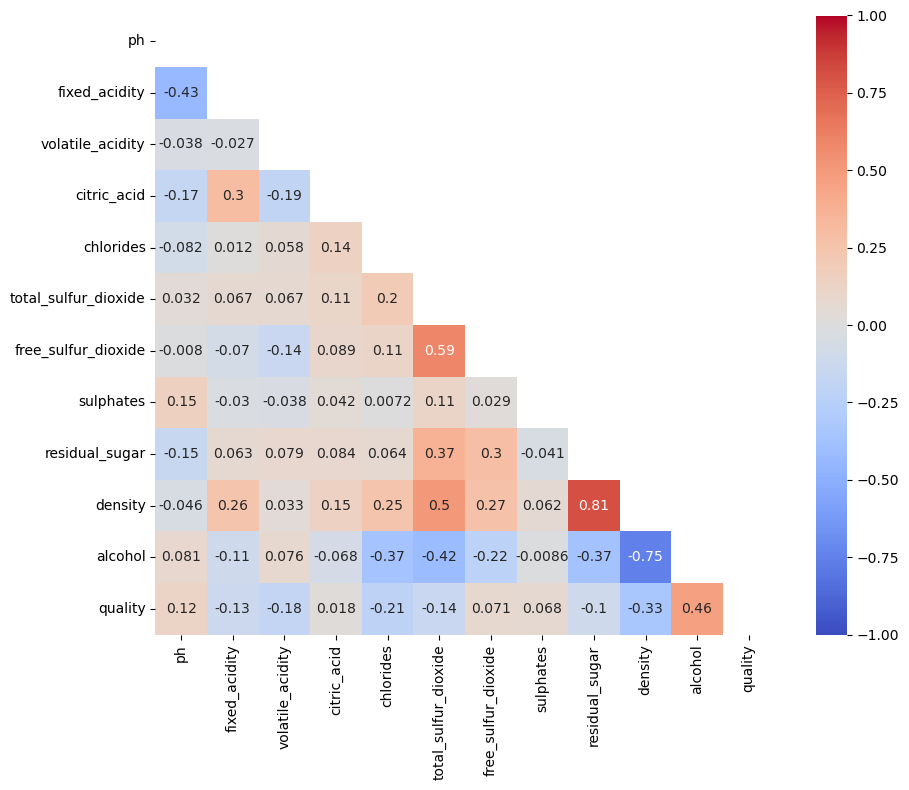

In [48]:
f, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(corr_w, dtype=bool))

sns.heatmap(corr_w, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

plt.tight_layout()

C:\Users\olive\AppData\Local\Temp\ipykernel_2392\1364656078.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


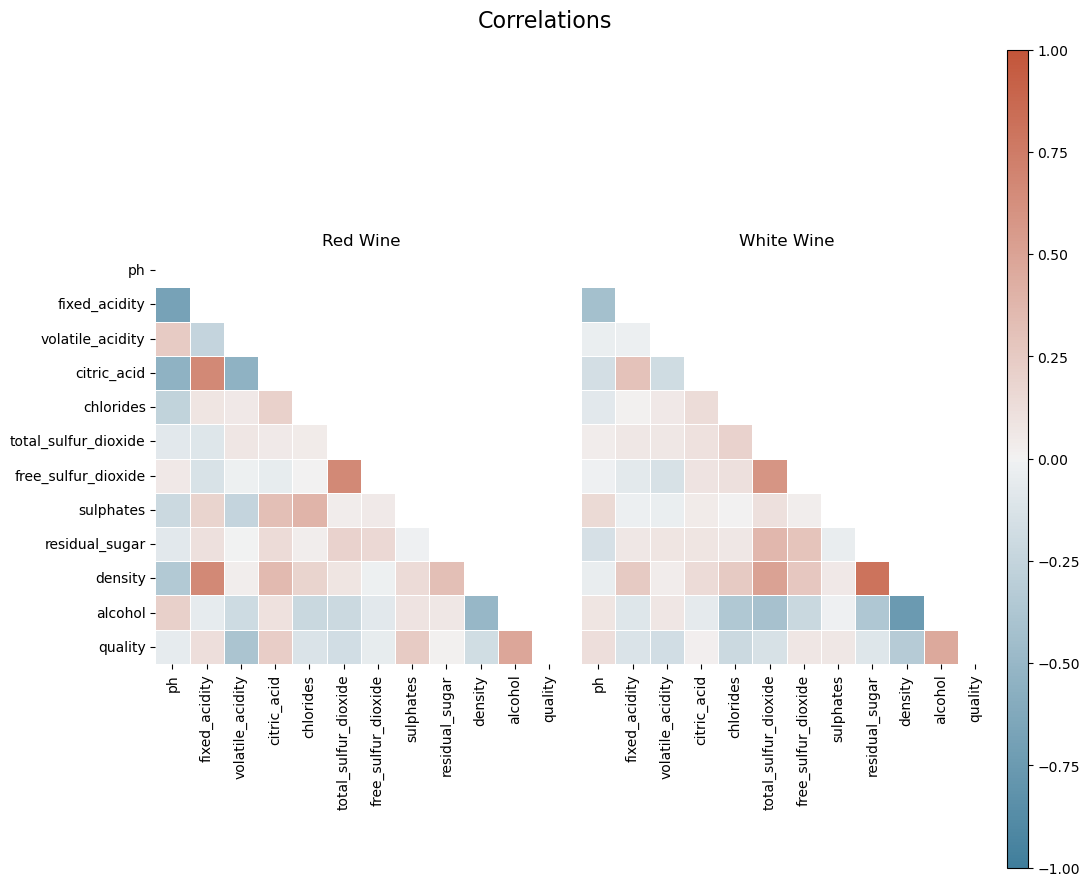

In [49]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_r, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(1, 3, figsize=(11, 9), gridspec_kw={"width_ratios":[1, 1, 0.05]})#,  sharex=True, sharey=True) # gridspec_kw={"width_ratios":[1, 1, 0.05]},
# ax = ax.flatten()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
cplot_wine_r = sns.heatmap(corr_r, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            ax=ax[0],
            cbar=False
            )

cplot_wine_w = sns.heatmap(corr_w, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            ax=ax[1],
            cbar=False
            )

# settings red wine plot
ax[0].set_title('Red Wine')

# settings white wine plot
ax[1].set_title('White Wine')
ax[1].set_yticks([], labels=[])
plt.legend().remove()

# colorbar
# TODO - reduce height of colorbar
mappable = cplot_wine_r.get_children()[0] # TODO - what's the artist? what does this mean?
plt.colorbar(mappable, cax=ax[2], orientation = 'vertical')#, pad=0.2)

# # legend
# # Get all lines and labels from all axes
# handles = []
# labels = []
# for ax in fig.axes:
#     for h, l in zip(*ax.get_legend_handles_labels()):
#         handles.append(h)
#         labels.append(l)

# # Remove any existing legends from subplots
# for ax in fig.axes:
#     if ax.get_legend():
#         ax.get_legend().remove()

# # Create figure-level legend
# # fig.legend(handles, labels, loc='upper center', 
# #            bbox_to_anchor=(0.5, 1.1), ncol=2)

# fig
fig.suptitle('Correlations', fontsize=16)

plt.tight_layout()

### Observations from corr for red wines
- The input parameter correlation are pretty weak, except for 
  - fixed acidity and citric acid strong correlation
  - fixed acidity and density strong correlation
  - volatile acidity and sulphates
  - citric acid and pH
  - citric acid and sulphates
  - pH and chlorides
  - pH and density
  - pH and alcohol
  - chlorides and sulphates
  - chlorides and density
  - chlorides and alcohol
  - sulfur dioxides and residual sugar
    - total sulfur dioxide and alcohol
  - density and alcohol
- Quality correlations
  - strong
    - alcohol: positive
  - medium
    - volatile acidity; negative
    - citric acid; positive
    - total sulfur dioxide, but not free; negative 
    - sulphates; positive
    - density: negative
  - weak >0.1
    - chlorides 

### Observations from corr for white wines
- The input parameter correlation are pretty weak, except for 
  - the quantities that are somewhat related, e.g. pH and acidity, whereas there are exceptions!
  - fixed acidity and density
  - sulfur oxides and residual sugar / density
  - density and fixed acidity
  - density and chlorides
  - alcohol and chlorides
  - alcohol and sulfur oxides
  - alcohol and density / residual sugar
- Quality correlations are 
  - high for (abs>0.4)
    - alcohol (positive correlation)
    - density (negative correlation), surprisingly not for residual sugar
  - medium for  (~0.2<abs<0.4)
    - volatile acidity: negative
    - chlorides: negative
  - weak
    - fixed acidity: negative
    - pH: positive
    - total sulfur dioxide: negative
    - residual sugar: negative

### Differences red and white
- input parameters
  - fixed acidity and volatile acidity: strong in red, weak in white
  - volatile acidity and sulphates: strong in red, weak in white
  - volatile acidity and alcohol: strong, negative in red, weak, positive in white
  - 

Questions on data set
- density and residual sugar correlate differently with the other quantities. Why? what does that mean? 
- What do the correlations between the input quantities mean?
- What is the meaning of sulphates in red wine?
- sulphates seem to be beneficial in red wines. 

### Quality Correlations

In [50]:
# TODO quality is a discrete variable; how to calculate the correlation coefficient? use point biserial
# stats.pointbiserialr(wine_r['quality'], wine_r['alcohol'])

In [51]:
wine_w.corr(numeric_only=True)

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.430543,-0.037870,-0.171578,-0.082261,0.032125,-0.008009,0.150084,-0.148466,-0.046109,0.080892,0.124728
fixed_acidity,-0.430543,1.000000,-0.026959,0.303949,0.012076,0.067025,-0.070463,-0.030019,0.062574,0.256298,-0.107196,-0.126223
volatile_acidity,-0.037870,-0.026959,1.000000,-0.189580,0.057725,0.066560,-0.142174,-0.038060,0.078651,0.032673,0.075996,-0.176806
citric_acid,-0.171578,0.303949,-0.189580,1.000000,0.135772,0.105628,0.089476,0.041514,0.083663,0.147407,-0.068027,0.017763
chlorides,-0.082261,0.012076,0.057725,0.135772,1.000000,0.197119,0.113852,0.007215,0.064395,0.250554,-0.366322,-0.213506
total_sulfur_dioxide,0.032125,0.067025,0.066560,0.105628,0.197119,1.000000,0.593333,0.112408,0.373877,0.502548,-0.416995,-0.144553
free_sulfur_dioxide,-0.008009,-0.070463,-0.142174,0.089476,0.113852,0.593333,1.000000,0.029049,0.295011,0.266566,-0.221298,0.071387
sulphates,0.150084,-0.030019,-0.038060,0.041514,0.007215,0.112408,0.029049,1.000000,-0.041439,0.062197,-0.008582,0.067996
residual_sugar,-0.148466,0.062574,0.078651,0.083663,0.064395,0.373877,0.295011,-0.041439,1.000000,0.808423,-0.371181,-0.103703
density,-0.046109,0.256298,0.032673,0.147407,0.250554,0.502548,0.266566,0.062197,0.808423,1.000000,-0.752621,-0.332974


In [52]:
wine_w.drop_duplicates(all_inputs).corr(numeric_only=True)

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.430543,-0.037870,-0.171578,-0.082261,0.032125,-0.008009,0.150084,-0.148466,-0.046109,0.080892,0.124728
fixed_acidity,-0.430543,1.000000,-0.026959,0.303949,0.012076,0.067025,-0.070463,-0.030019,0.062574,0.256298,-0.107196,-0.126223
volatile_acidity,-0.037870,-0.026959,1.000000,-0.189580,0.057725,0.066560,-0.142174,-0.038060,0.078651,0.032673,0.075996,-0.176806
citric_acid,-0.171578,0.303949,-0.189580,1.000000,0.135772,0.105628,0.089476,0.041514,0.083663,0.147407,-0.068027,0.017763
chlorides,-0.082261,0.012076,0.057725,0.135772,1.000000,0.197119,0.113852,0.007215,0.064395,0.250554,-0.366322,-0.213506
total_sulfur_dioxide,0.032125,0.067025,0.066560,0.105628,0.197119,1.000000,0.593333,0.112408,0.373877,0.502548,-0.416995,-0.144553
free_sulfur_dioxide,-0.008009,-0.070463,-0.142174,0.089476,0.113852,0.593333,1.000000,0.029049,0.295011,0.266566,-0.221298,0.071387
sulphates,0.150084,-0.030019,-0.038060,0.041514,0.007215,0.112408,0.029049,1.000000,-0.041439,0.062197,-0.008582,0.067996
residual_sugar,-0.148466,0.062574,0.078651,0.083663,0.064395,0.373877,0.295011,-0.041439,1.000000,0.808423,-0.371181,-0.103703
density,-0.046109,0.256298,0.032673,0.147407,0.250554,0.502548,0.266566,0.062197,0.808423,1.000000,-0.752621,-0.332974


### Correlation without Outliers and without Duplicates

## Plot Configuration

In [ ]:
# plot configs
# TODO - how to transfer the config efficiently to the figures? 

# first, try a dictionary
wine_type_colors = {'red_wine':'red', 'white_wine':'gray'}
quality_label_colors = {'low':'o', 'medium':'g', 'high':'b'}
input_param_colors = {
    'fixed_acidity'         : 'darkorange',
    'volatile_acidity'      : 'burlywood',
    'citric_acid'           : 'antiquewhite',
    'ph'                    : 'chocolate',
    'chlorides'             : 'turquoise',
    'free_sulfur_dioxide'   : 'khaki',
    'total_sulfur_dioxide'  : 'gold',
    'sulphates'             : 'yellow',
    'residual_sugar'        : 'crimson',
    'density'               : 'cornflowerblue',
    'alcohol'               : 'blueviolet'
}

# second, try a class! Could be easier

# define variables; problem: in the end I will have many many variables in the space that I do not understand anymore
color_red = 'red'
color_white = 'gray'

## Quantities

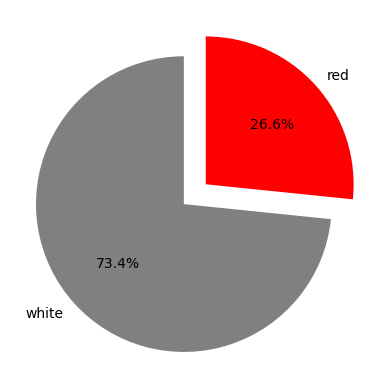

In [54]:
wine_types_count = wine.color.value_counts()

fig, ax = plt.subplots()
ax.pie(
    wine_types_count.values, labels=wine_types_count.index, 
    colors=[wine_type_colors['white_wine'], wine_type_colors['red_wine']],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0.1)#, 0, 1), (0.1, 0.1, 0, 1)]
    );

# Wine Quality

## Quality distribution

c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\numpy\ma\core.py:3463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval
c:\Users\olive\anaconda3\envs\base_data_analysis\Lib\site-packages\numpy\ma\core.py:3463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  _data[indx] = dval


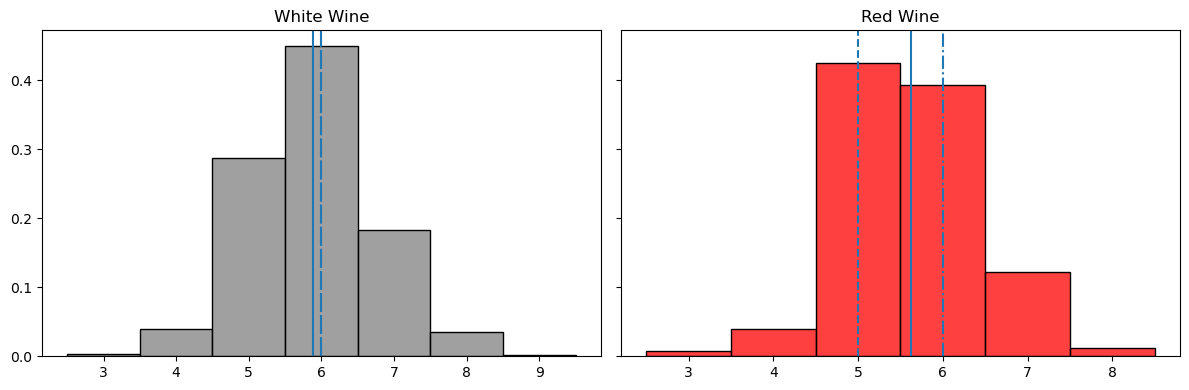

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharey=True)

# NOTE draw bars in the middle of the value without gaps -> discrete=True
# NOTE kde does not make sense here, does it?
sns.histplot(wine_w.quality, ax=ax[0], color=color_white, discrete=True, stat='density') #, kde=True)
sns.histplot(wine_r.quality, ax=ax[1], color=color_red, discrete=True, stat='density') #, kde=True)

ax[0].set_title('White Wine')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

# show average, median and mode
ylim = ax[0].get_ylim() # TODO find a way to skip this workaround
ax[0].vlines(
    [wine_w.quality.mean(), wine_w.quality.median(), wine_w.quality.mode()],
    ymin=ax[0].get_ylim()[0],
    ymax=ax[0].get_ylim()[1],
    linestyles=['solid', '-.', '--']
)
ax[0].set_ylim(ylim)

ylim=ax[1].get_ylim()
ax[1].vlines(
    [wine_r.quality.mean(), wine_r.quality.median(), wine_r.quality.mode()],
    ymin=ax[1].get_ylim()[0],
    ymax=ax[1].get_ylim()[1],
    linestyles=['solid', '-.', '--']
)
ax[1].set_ylim(ylim)

plt.tight_layout()

In [56]:
wine_w_top10 = wine_w.drop_duplicates(all_inputs).sort_values('quality', ascending=False).head(10)
wine_w_top10

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label
774,3.20,9.1,0.27,0.45,0.035,124.0,28.0,0.46,10.6,0.99700,10.4,9,white,high
827,3.28,7.4,0.24,0.36,0.031,139.0,27.0,0.48,2.0,0.99055,12.5,9,white,high
1605,3.37,7.1,0.26,0.49,0.032,113.0,31.0,0.42,2.2,0.99030,12.9,9,white,high
820,3.41,6.6,0.36,0.29,0.021,85.0,24.0,0.61,1.6,0.98965,12.4,9,white,high
876,3.28,6.9,0.36,0.34,0.018,119.0,57.0,0.36,4.2,0.98980,12.7,9,white,high
3378,3.16,6.1,0.28,0.27,0.030,140.0,56.0,0.42,4.7,0.99042,12.5,8,white,high
3659,3.20,5.4,0.53,0.16,0.036,128.0,34.0,0.53,2.7,0.98856,13.2,8,white,high
280,3.19,7.0,0.24,0.36,0.034,112.0,22.0,0.38,2.8,0.99000,12.6,8,white,high
281,3.30,6.1,0.31,0.58,0.039,114.0,36.0,0.60,5.0,0.99090,12.3,8,white,high
311,3.53,5.0,0.55,0.14,0.032,164.0,35.0,0.51,8.3,0.99180,12.5,8,white,high


In [57]:
wine_w_norm_top10 = wine_w_norm.drop_duplicates(all_inputs).sort_values('quality', ascending=False).head(16)
wine_w_norm_top10

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,quality_label
827,0.218182,0.480769,0.245098,0.265060,0.044510,0.388060,0.057377,0.209302,0.088190,0.088490,0.741935,9.0,high
820,0.336364,0.403846,0.176471,0.216867,0.133531,0.557214,0.229508,0.581395,0.021472,0.094274,0.580645,9.0,high
774,0.536364,0.298077,0.156863,0.234940,0.160237,0.631841,0.131148,0.302326,0.010736,0.109697,0.387097,9.0,high
876,0.500000,0.182692,0.019608,0.162651,0.112760,0.452736,0.155738,0.279070,0.010736,0.109697,0.241935,9.0,high
1605,0.409091,0.326923,0.156863,0.114458,0.106825,0.830846,0.418033,0.186047,0.108896,0.167534,0.241935,9.0,high
2389,0.400000,0.384615,0.088235,0.301205,0.106825,0.651741,0.270492,0.209302,0.010736,0.063428,0.645161,8.0,high
904,0.727273,0.211538,0.156863,0.192771,0.062315,0.597015,0.262295,0.220930,0.087423,0.144399,0.387097,8.0,high
2390,0.709091,0.163462,0.107843,0.162651,0.091988,0.467662,0.409836,0.197674,0.004601,0.060729,0.516129,8.0,high
2342,0.481818,0.192308,0.225490,0.192771,0.044510,0.422886,0.213115,0.348837,0.059816,0.037594,0.919355,8.0,high
832,0.409091,0.230769,0.460784,0.271084,0.118694,0.880597,0.204918,0.325581,0.174847,0.198381,0.209677,8.0,high


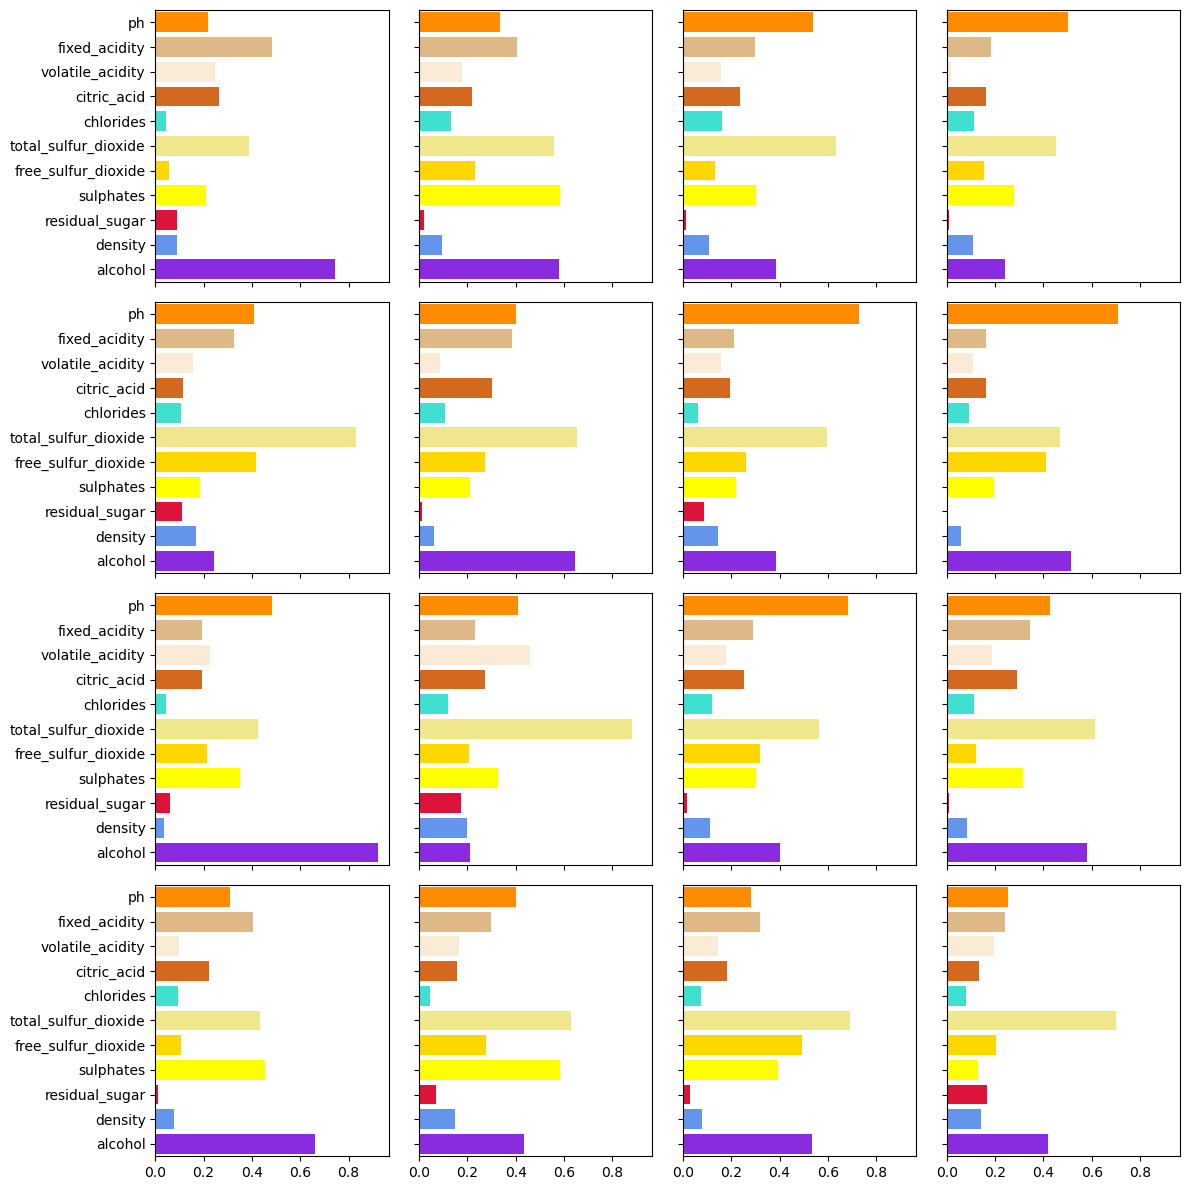

In [58]:
# plot physiochemical profile of the top wines
fig,ax = plt.subplots(4,4, figsize=(12,12), sharex=True, sharey=True)
ax = ax.flatten()

for w, a in zip(wine_w_norm_top10[all_inputs].values, ax):
   #  print(w)
   sns.barplot(y=all_inputs, x=w, ax=a, orient='h')
   #  sns.barplot(x=all_inputs, y=w, ax=a, orient='v')
   #  a.tick_params(axis='x', labelrotation=90)

   for bars in a.containers:
      for bar, color in zip(bars, input_param_colors.values()):
         bar.set_facecolor(color)

# take away the spines
# sns.despine()

plt.tight_layout()

#### White Wine Quality Distribution
  - avg: 5.8. avg=median, mode: 6
  - slighty negatively skewed, almost symmetric distribution
  - conclusion
    - Kind of normally distributed data set
    - sample: average wine years, wines meet the expectations, maybe slightly more bad wines
    - tasters: testing might not be symmetric
    - good representation of sample and testers

#### Red Wine Quality Distribution
  - avg: 5.6, median: 6, mode: 5
  - more shifted to lower ratings
  - skew unclear: positively skewed?
  - conclusions
    - Kind of normally distributed data set
    - sample: wine could be from relatively bad years
    - tasters: testing might not be symmetric
    - good representation of sample and testers

## Quality Label distribution

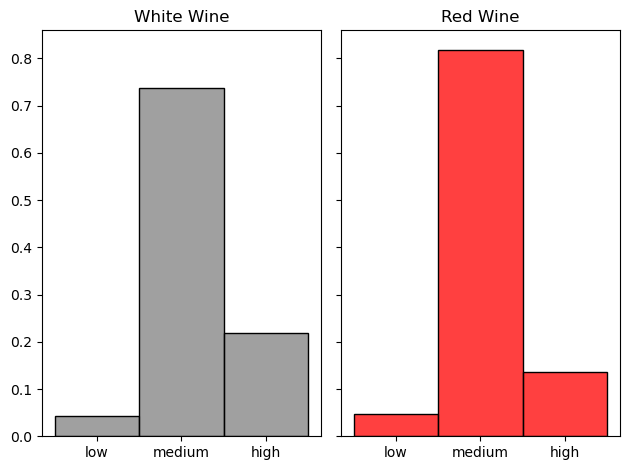

In [59]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)

sns.histplot(wine_w.quality_label, ax=ax[0], color=color_white, stat="density") # NOTE stat = density for normalization
sns.histplot(wine_r.quality_label, ax=ax[1], color=color_red, stat="density")

ax[0].set_title('White Wine')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

plt.tight_layout()

In [60]:
wine_r.quality_label.value_counts()

quality_label
medium    1112
high       184
low         63
Name: count, dtype: int64

In [61]:
wine_w.quality_label.value_counts()

quality_label
medium    2765
high       819
low        162
Name: count, dtype: int64

Questions: 
- move the quality label?
- create a new quality label based on the high quality wines? 

Follow-Up Tasks
- Investigate high quality wines for similarities in chemical composition. Is there a composition that convinced the testers the most?
-  

## Alcohol vs. Wine Quality

### Quality Rating

<Axes: xlabel='quality', ylabel='alcohol'>

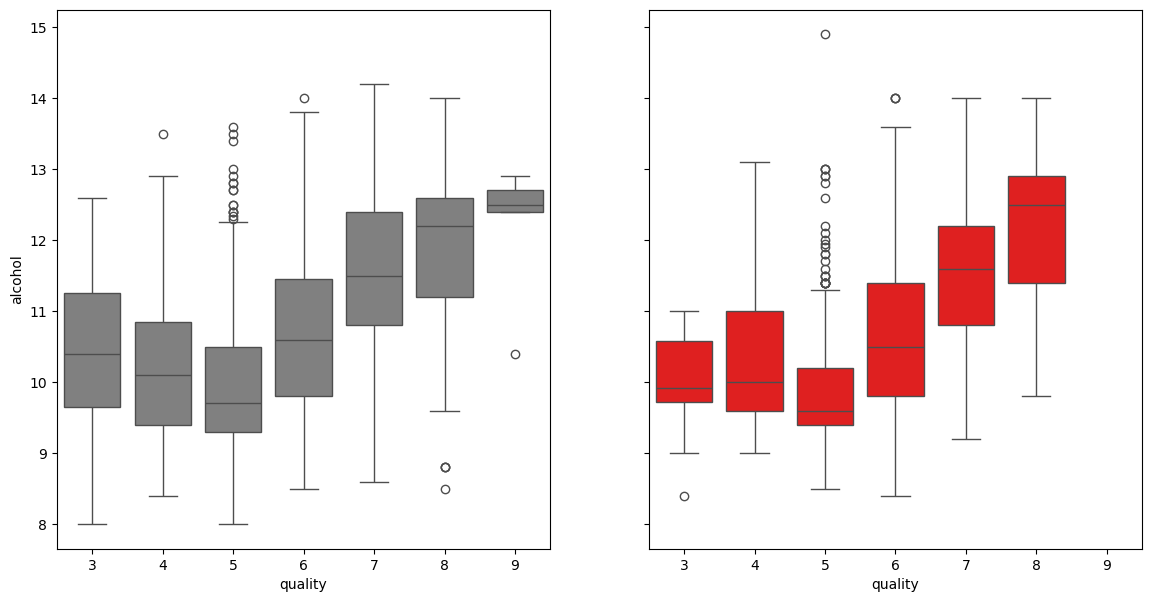

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(14,7), sharex=True, sharey=True)

sns.boxplot(wine_w, y='alcohol', x='quality', ax=ax[0], color=wine_type_colors['white_wine'])
sns.boxplot(wine_r, y='alcohol', x='quality', ax=ax[1], color=wine_type_colors['red_wine'])

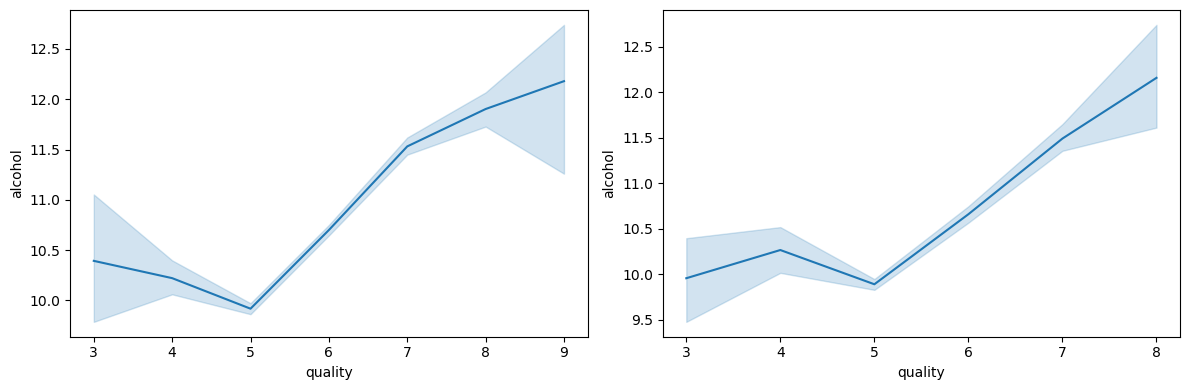

In [63]:
# TODO plot the averages and std
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(x=wine_w.quality, y=wine_w.alcohol, ax=ax[0])
sns.lineplot(wine_r, x='quality', y='alcohol', ax=ax[1])

plt.tight_layout()

- Alcohol content is an indicator of good wine, however it's not decisive, because low quality wines also have a high alcohol content
- Alcohol, Alcohol and Residual Sugar are indicators of the fermentation process.
- Usually 50% of the input sugar can be turned into alcohol before fermentation stops.

#### Questions
- Is there a reason for this distribution?

#### Tasks
- Investigate the increase from rating of 5; cut out the bad wines, to find out a what's a good wine.

### Quality Labels

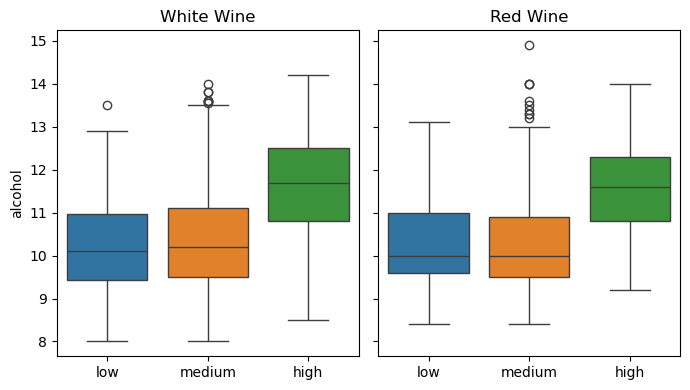

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(7,4), sharex=True, sharey=True)
ax = ax.flatten()

# sns.boxplot(wine_r, x='quality', y='alcohol', ax=ax[0])
# sns.boxplot(wine_w, x='quality', y='alcohol', ax=ax[1])
sns.boxplot(wine_w, x='quality_label', y='alcohol', hue='quality_label', ax=ax[0])
sns.boxplot(wine_r, x='quality_label', y='alcohol', hue='quality_label', ax=ax[1])

ax[0].set_title('White Wine')
ax[0].set_xlabel('')

ax[1].set_title('Red Wine')
ax[1].set_xlabel('')

plt.tight_layout()

### Hypothesis Testing with Kruskal-Wallis, Welch ANOVA, ANOVA 

In [65]:
# test if ANOVA assumptions are met
print(pg.normality(wine_w, dv='alcohol', group='quality_label'))
print()
print(wine_w.groupby('quality_label').alcohol.var())

                      W          pval  normal
quality_label                                
medium         0.957470  1.045046e-27   False
high           0.983325  4.837952e-08   False
low            0.976046  6.503018e-03   False

quality_label
low       1.109730
medium    1.211852
high      1.273901
Name: alcohol, dtype: float64


C:\Users\olive\AppData\Local\Temp\ipykernel_2392\204133251.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(wine_w.groupby('quality_label').alcohol.var())


In [66]:
# use Welch ANOVA
pg.welch_anova(wine_w, dv='alcohol', between='quality_label')

,Source,ddof1,ddof2,F,p-unc,np2
0,quality_label,2,415.196513,372.657783,2.132924e-93,0.170319


In [67]:
f,p = stats.kruskal(
    wine_w.loc[wine_w.quality_label=='low', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='medium', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='high', 'alcohol']
)

print(f,p)

593.7456078062245 1.1743010189766468e-129


In [68]:
# for comparison: ANOVA TEST on quality label and alcohol content
f,p = stats.f_oneway(
    wine_w.loc[wine_w.quality_label=='low', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='medium', 'alcohol'],
    wine_w.loc[wine_w.quality_label=='high', 'alcohol']
)

print(f, p)

384.18674752639254 1.7458936868224823e-152


### Conclusions on quality distribution

- High quality wines tend to have a higher alcohol content.
- The range is however very large.
- Although there is a strong, positive correlation between quality alcohol, the outliers show that this is not a conclusive measure for quality.
- Medium quality wines have a low alcohol content, but there are many outliers with a very high alcohol content in this group.

Questions
- What are the features of medium quality wines?
- How do wines get a high alcohol content?
  - yeast turns sugar into alcohol and ??? 
  - residual sugar -> sweetness
  - What about density?
  - acidity

## Density vs. Wine Quality 

<Axes: xlabel='quality', ylabel='density'>

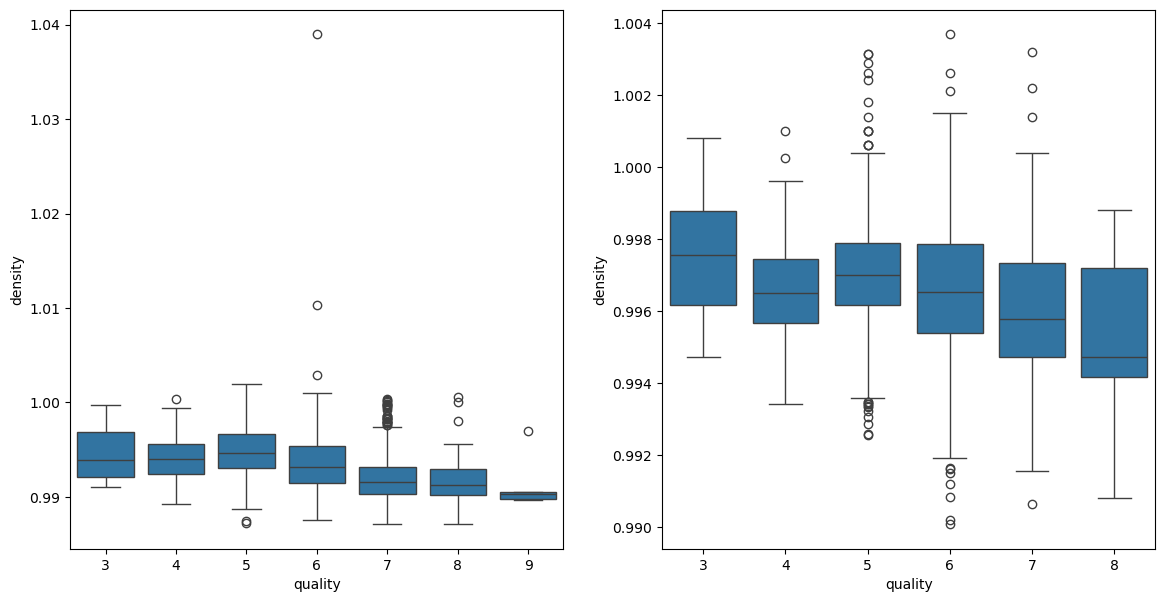

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='density', ax=ax[0])
sns.boxplot(wine_r, x='quality', y='density', ax=ax[1])



# new_ylim = [ax[1].get_ylim()[0], ax[0].get_ylim()[1]]
# ax[0].set_ylim(new_ylim)
# ax[1].set_ylim(new_ylim)

In [70]:
wine_w.loc[wine_w.density.sort_values(ascending=False).index, :].head()

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label
2781,3.39,7.8,0.965,0.60,0.074,160.0,8.0,0.69,65.80,1.03898,11.7,6,white,medium
1653,3.15,7.9,0.330,0.28,0.053,176.0,35.0,0.38,31.60,1.01030,8.8,6,white,medium
3619,3.06,6.8,0.450,0.28,0.031,122.0,27.0,0.42,26.05,1.00295,10.6,6,white,medium
3420,3.01,7.6,0.280,0.49,0.060,145.0,30.0,0.44,20.15,1.00196,8.5,5,white,medium
2419,3.39,6.1,0.360,0.41,0.070,207.0,67.0,0.53,19.35,1.00118,9.1,5,white,medium


Question:
- What is wine density? 

## Residual Sugar vs. Wine Quality 

<Axes: xlabel='quality', ylabel='residual_sugar'>

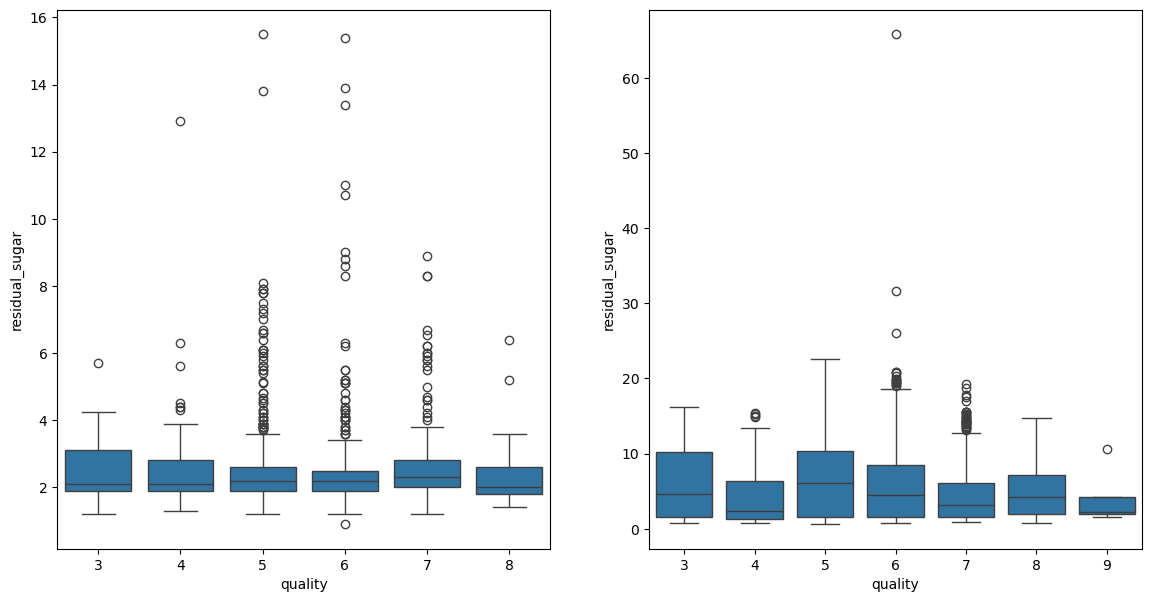

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_r, y='residual_sugar', x='quality', ax=ax[0])
sns.boxplot(wine_w, y='residual_sugar', x='quality', ax=ax[1])

## Sulphates vs. Wine Quality

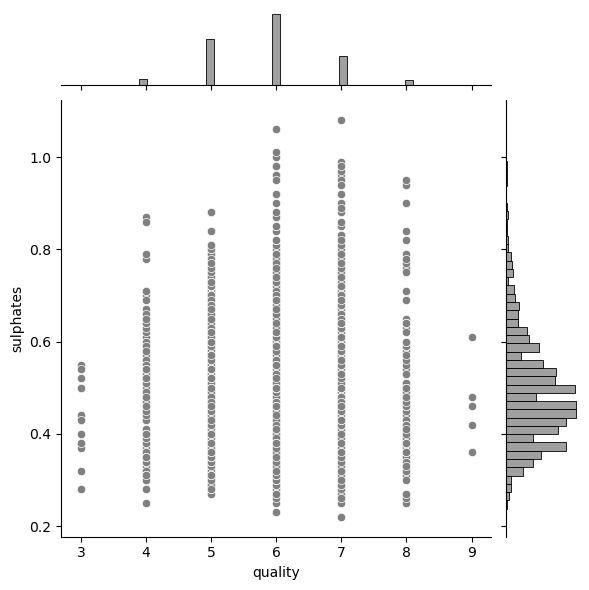

In [72]:
# fig, ax = plt.subplots(1, 2)

jg = sns.jointplot(data=wine_w, x="quality", y="sulphates", color=wine_type_colors['white_wine'])

# plt.tight_layout()

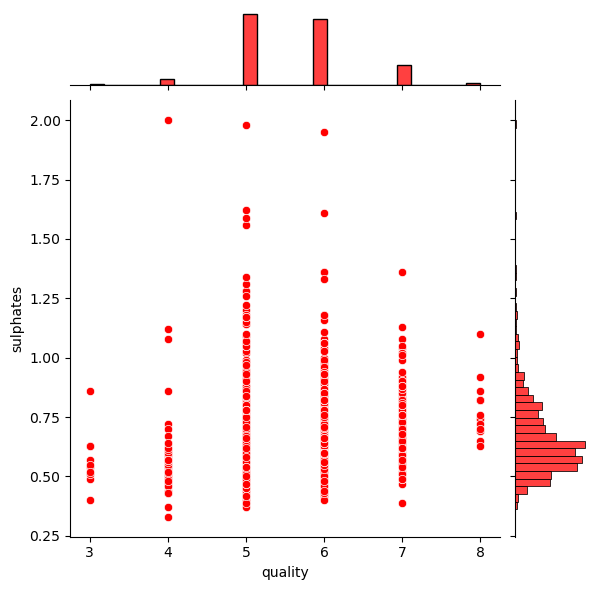

In [73]:
sns.jointplot(data=wine_r, x="quality", y="sulphates", color=wine_type_colors['red_wine'])

## Fixed Acidity vs. Wine Quality

<Axes: xlabel='quality', ylabel='fixed_acidity'>

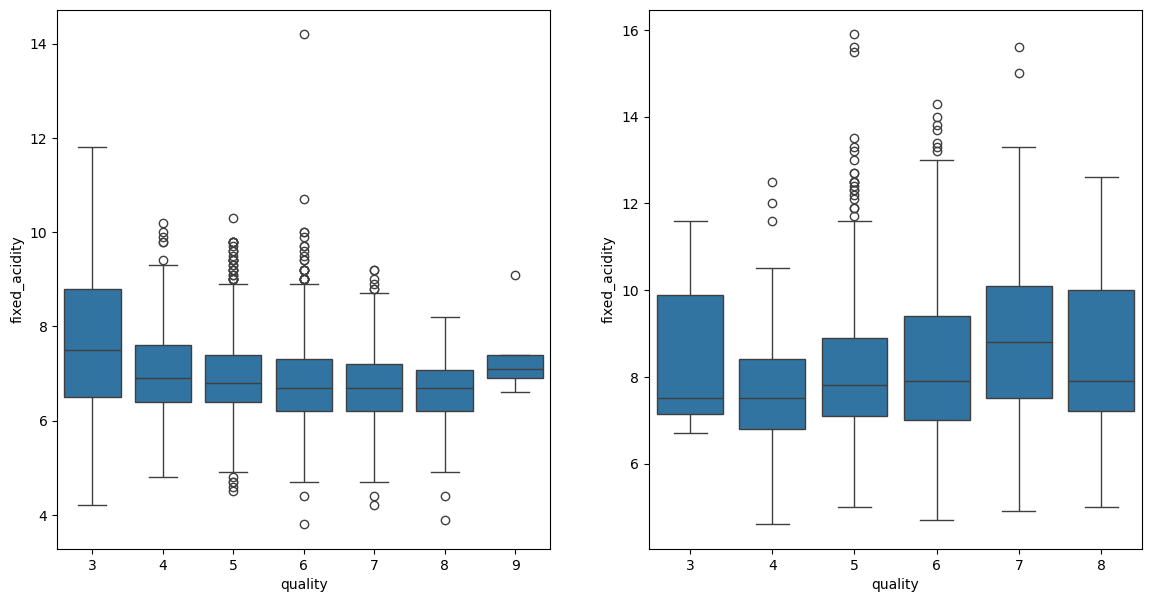

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='fixed_acidity', ax=ax[0])
sns.boxplot(wine_r, x='quality', y='fixed_acidity', ax=ax[1])

## Volatile Acidity vs. Wine Quality

<Axes: xlabel='quality', ylabel='volatile_acidity'>

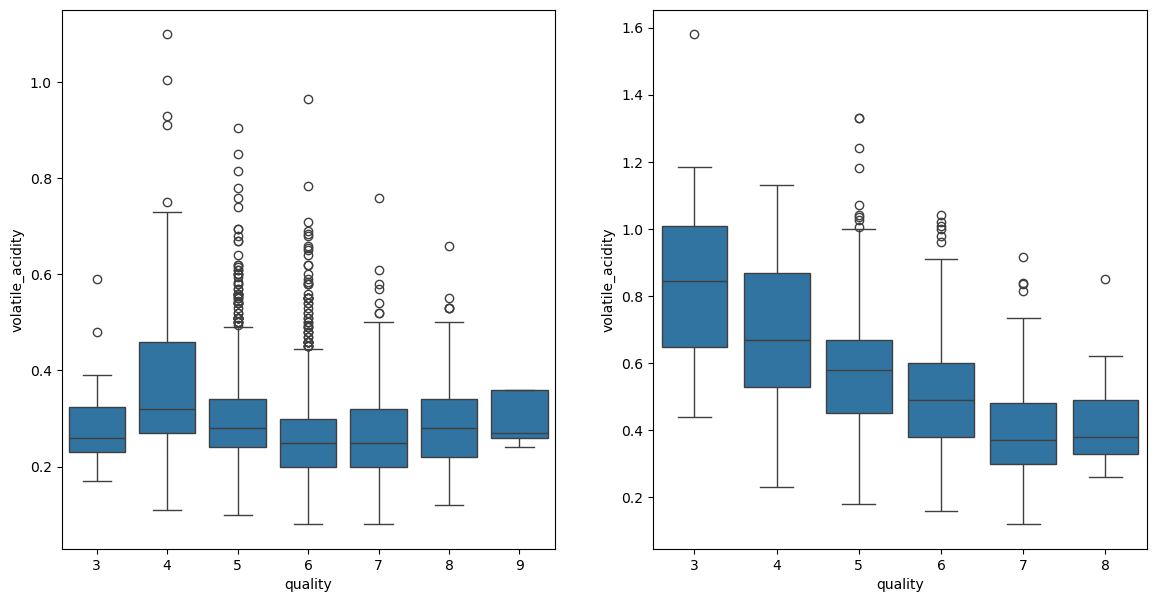

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.boxplot(wine_w, x='quality', y='volatile_acidity', ax=ax[0])
sns.boxplot(wine_r, x='quality', y='volatile_acidity', ax=ax[1])

<Axes: xlabel='quality', ylabel='volatile_acidity'>

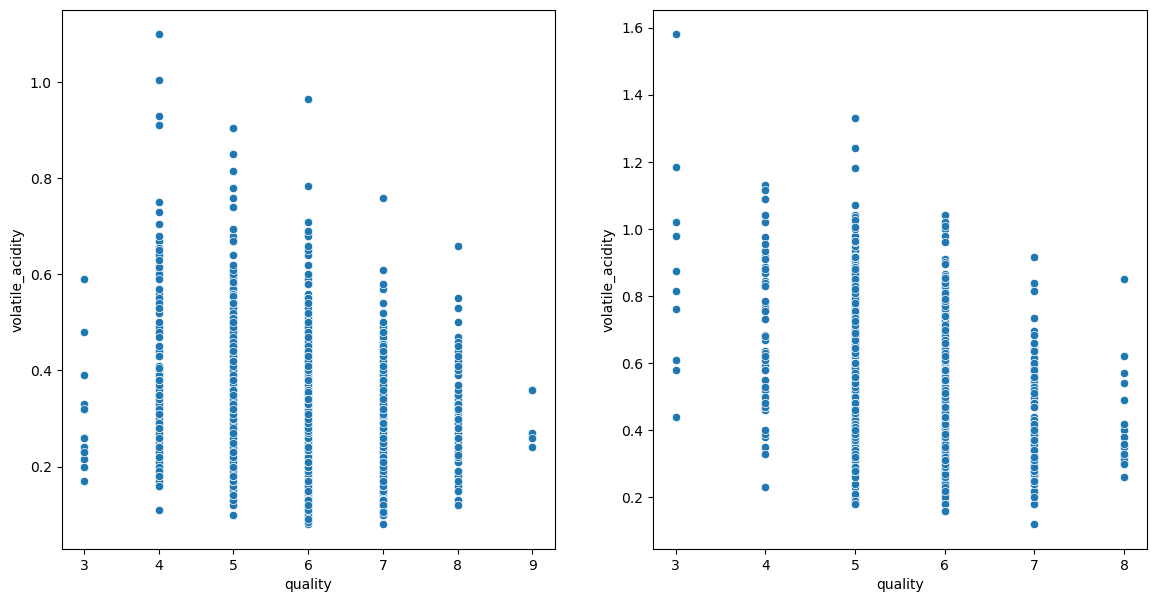

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.scatterplot(wine_w, x='quality', y='volatile_acidity', ax=ax[0])
sns.scatterplot(wine_r, x='quality', y='volatile_acidity', ax=ax[1])

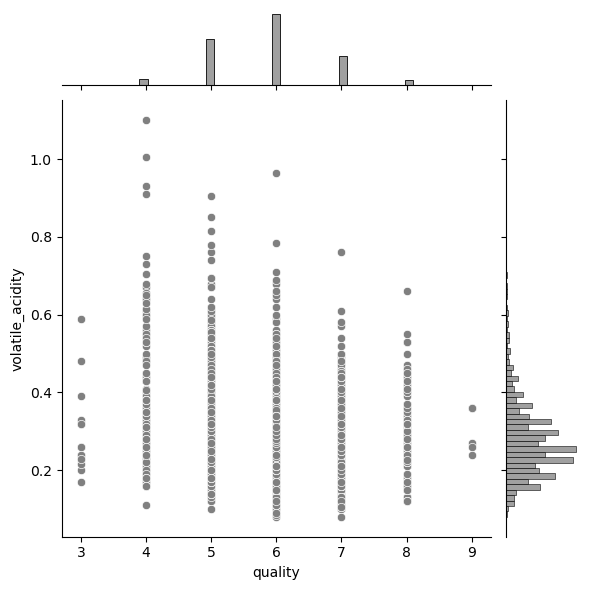

In [77]:
sns.jointplot(data=wine_w, x="quality", y="volatile_acidity", color=wine_type_colors['white_wine'])

## pH vs Wine Quality

<Axes: xlabel='quality', ylabel='ph'>

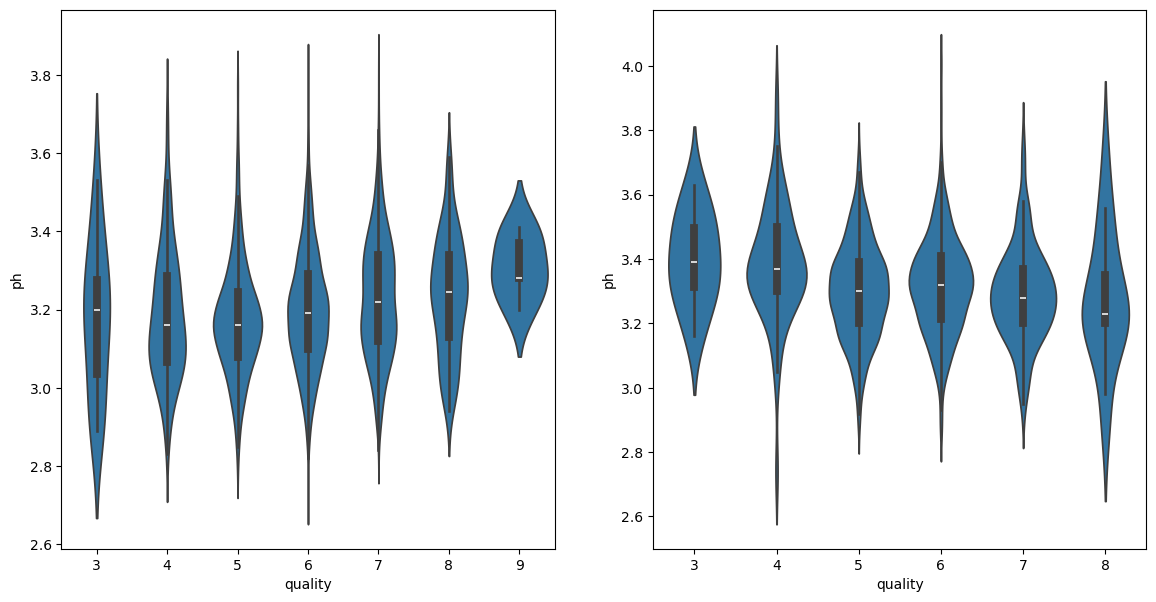

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))

sns.violinplot(wine_w, x='quality', y='ph', ax=ax[0])
sns.violinplot(wine_r, x='quality', y='ph', ax=ax[1])

### pH vs residual sugar vs wine quality

(0.0, 40.0)

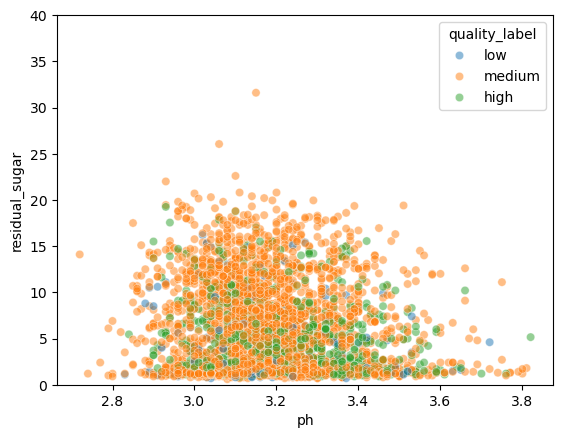

In [79]:
ax = sns.scatterplot(
    y=wine_w.residual_sugar,
    x=wine_w.ph,
    hue=wine_w.quality_label,
    alpha=0.5
)

ax.set_ylim([0, 40])

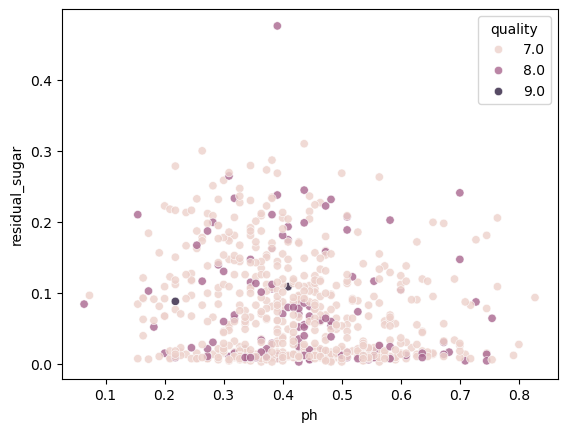

In [80]:
ax = sns.scatterplot(
    wine_w_norm[wine_w_norm.quality>6],
    y='residual_sugar',
    x='ph',
    hue='quality',
    alpha=0.8
)

# ax.set_ylim([0, 40])

## High Quality Wines

In [81]:
wine_w_hq = wine_w[wine_w.quality_label == 'high']

In [82]:
# TODO What does this mean? Does this make sense? 

corr_wine_w_hq = wine_w_hq.corr(numeric_only=True)
corr_wine_w_hq

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality
ph,1.000000,-0.467400,-0.019420,-0.122593,-0.001172,0.080824,0.027190,0.169167,-0.225945,-0.020324,-0.032454,0.029708
fixed_acidity,-0.467400,1.000000,-0.074299,0.280062,0.123532,0.130624,-0.016673,-0.084597,0.178938,0.404872,-0.238825,-0.013982
volatile_acidity,-0.019420,-0.074299,1.000000,-0.261137,-0.242445,-0.050157,-0.167689,-0.044730,0.061671,-0.246967,0.486147,0.087743
citric_acid,-0.122593,0.280062,-0.261137,1.000000,0.145861,0.150514,0.137387,-0.065506,0.082979,0.189449,-0.167766,0.053715
chlorides,-0.001172,0.123532,-0.242445,0.145861,1.000000,0.277505,0.167346,0.066473,0.106465,0.388911,-0.465616,-0.053494
total_sulfur_dioxide,0.080824,0.130624,-0.050157,0.150514,0.277505,1.000000,0.562227,0.029700,0.324408,0.463778,-0.322942,-0.005164
free_sulfur_dioxide,0.027190,-0.016673,-0.167689,0.137387,0.167346,0.562227,1.000000,0.149413,0.102112,0.162399,-0.171028,0.041373
sulphates,0.169167,-0.084597,-0.044730,-0.065506,0.066473,0.029700,0.149413,1.000000,-0.113287,0.061962,-0.078519,-0.049346
residual_sugar,-0.225945,0.178938,0.061671,0.082979,0.106465,0.324408,0.102112,-0.113287,1.000000,0.739757,-0.296075,0.043804
density,-0.020324,0.404872,-0.246967,0.189449,0.388911,0.463778,0.162399,0.061962,0.739757,1.000000,-0.788279,-0.053987


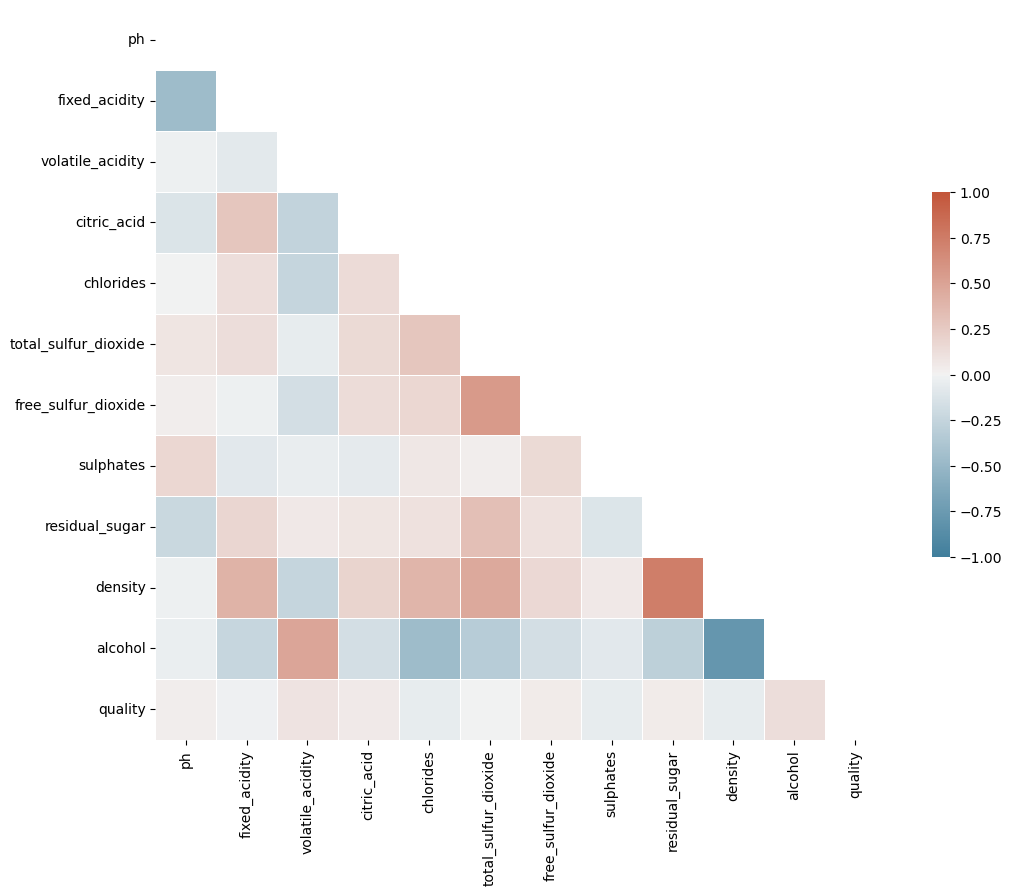

In [83]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_wine_w_hq, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))#,  sharex=True, sharey=True) # gridspec_kw={"width_ratios":[1, 1, 0.05]},
# ax = ax.flatten()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

cplot_wine_w = sns.heatmap(corr_wine_w_hq, mask=mask, 
            cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            cbar=True
            )

plt.tight_layout()

Very low quality correlations! So, from the inputs one cannot really say if a wine is high quality. 

# Inputs

## Fixed Acidity

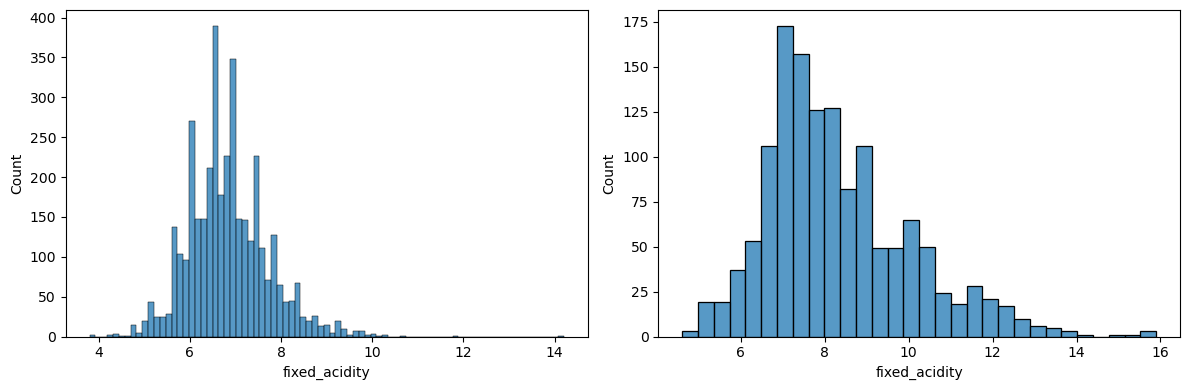

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='fixed_acidity', ax=ax[0])
sns.histplot(wine_r, x='fixed_acidity', ax=ax[1])

plt.tight_layout()

## Volatile Acidity

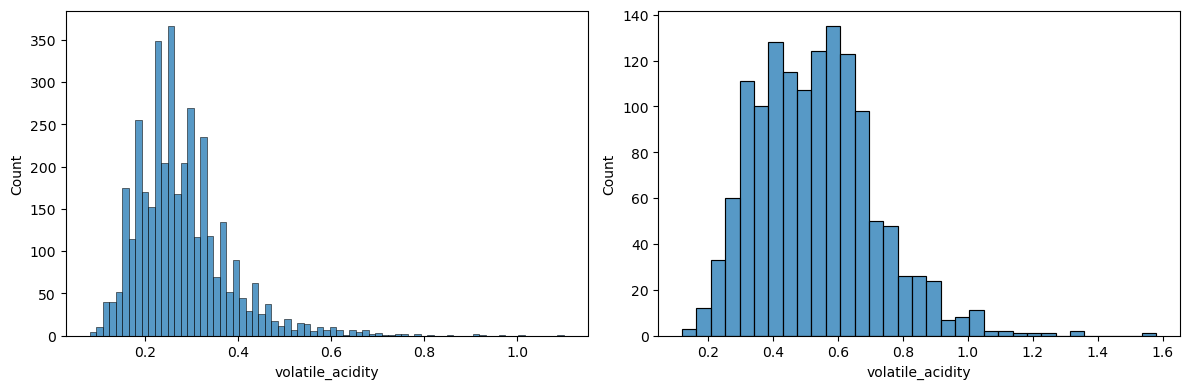

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='volatile_acidity', ax=ax[0])
sns.histplot(wine_r, x='volatile_acidity', ax=ax[1])

plt.tight_layout()

## Citric Acid

<Axes: xlabel='citric_acid', ylabel='Count'>

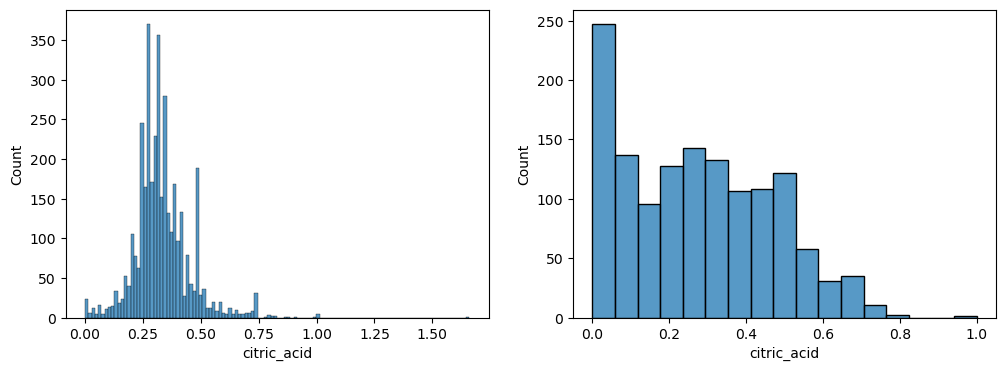

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='citric_acid', ax=ax[0])
sns.histplot(wine_r, x='citric_acid', ax=ax[1])

In [87]:
pg.normality(wine_w.citric_acid)

,W,pval,normal
citric_acid,0.920685,1.328791e-40,False


## pH

<Axes: xlabel='ph', ylabel='Count'>

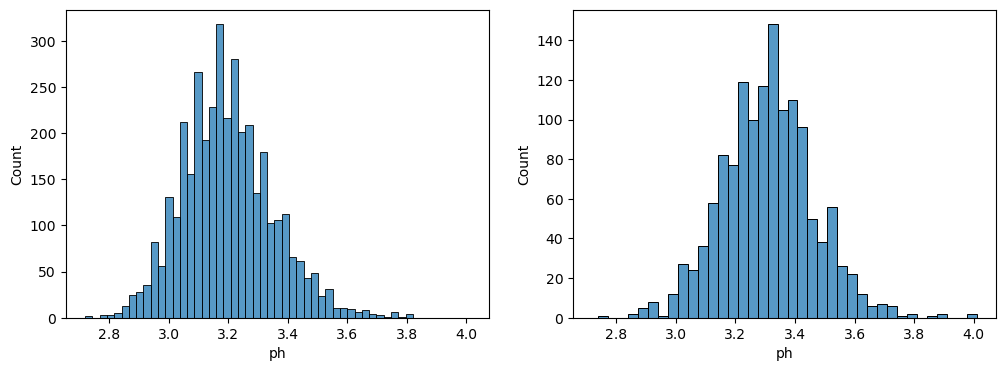

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharex=True)

sns.histplot(wine_w, x='ph', ax=ax[0])
sns.histplot(wine_r, x='ph', ax=ax[1])

In [89]:
print(pg.normality(wine_w.ph))

           W          pval  normal
ph  0.988636  8.735015e-17   False


## Chlorides

<Axes: xlabel='chlorides', ylabel='Count'>

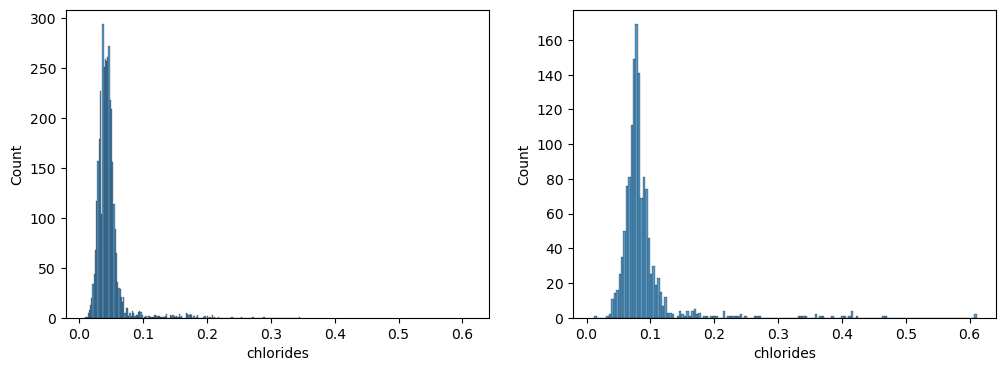

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(12,4), sharex=True)#, sharey=True)

sns.histplot(wine_w, x='chlorides', ax=ax[0])
sns.histplot(wine_r, x='chlorides', ax=ax[1])

## Total Sulfur Dioxide

<Axes: xlabel='total_sulfur_dioxide', ylabel='Count'>

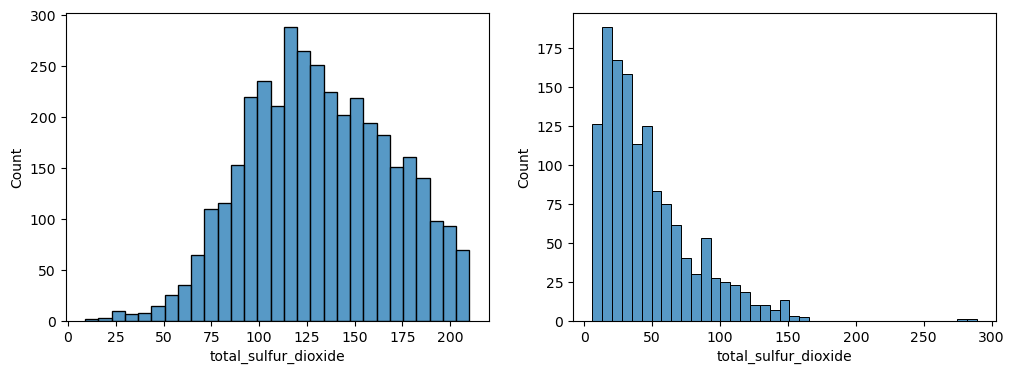

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='total_sulfur_dioxide', ax=ax[0])
sns.histplot(wine_r, x='total_sulfur_dioxide', ax=ax[1])

## Free Sulfur Dioxide

<Axes: xlabel='free_sulfur_dioxide', ylabel='Count'>

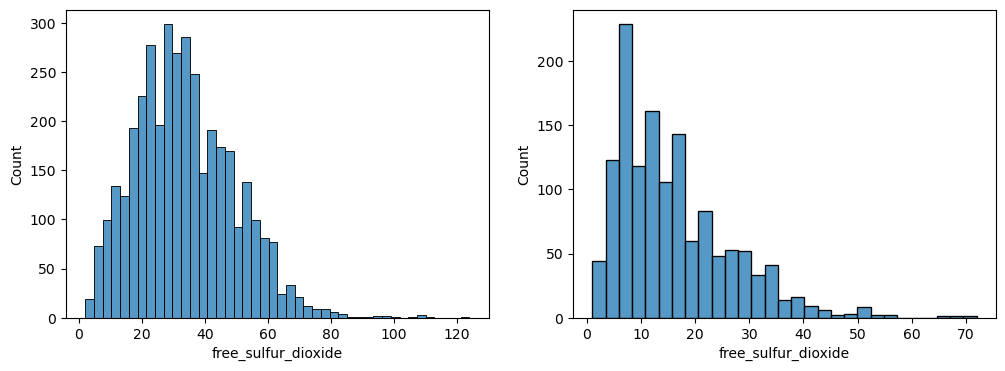

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='free_sulfur_dioxide', ax=ax[0])
sns.histplot(wine_r, x='free_sulfur_dioxide', ax=ax[1])

## Sulphates

<Axes: xlabel='sulphates', ylabel='Count'>

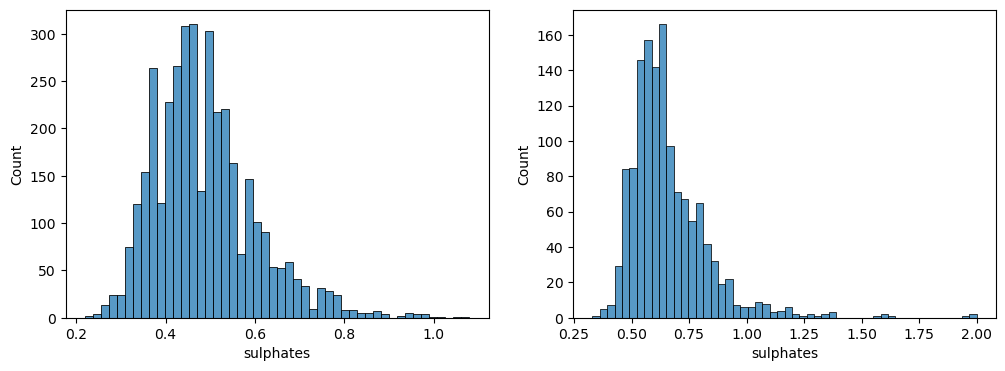

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

sns.histplot(wine_w, x='sulphates', ax=ax[0])
sns.histplot(wine_r, x='sulphates', ax=ax[1])

## Density

<Axes: xlabel='density', ylabel='Density'>

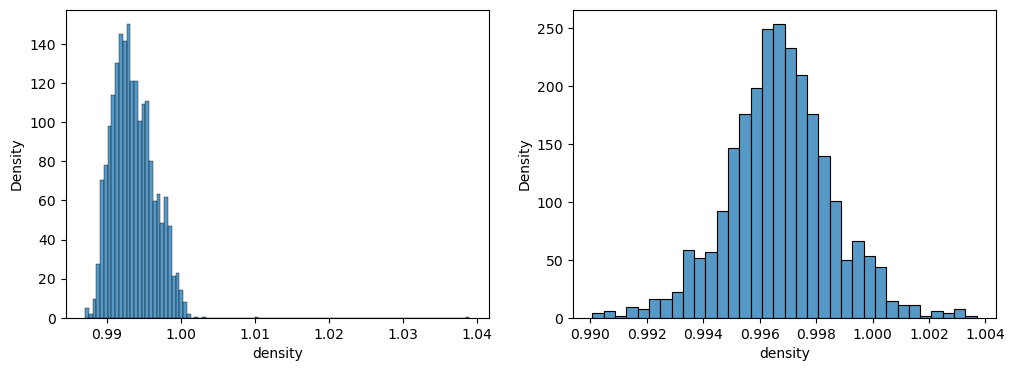

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))#, sharey=True)

# TODO Why is the plot not normalized?
sns.histplot(x=wine_w.density, stat='density', ax=ax[0])
sns.histplot(x=wine_r.density, stat='density', ax=ax[1])

### Density Outlier

In [95]:
high_density_wines_w = wine_w.loc[wine_w.density.sort_values(ascending=False).index, :].head(10)
high_density_wines_w

,ph,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,free_sulfur_dioxide,sulphates,residual_sugar,density,alcohol,quality,color,quality_label
2781,3.39,7.8,0.965,0.60,0.074,160.0,8.0,0.69,65.80,1.03898,11.7,6,white,medium
1653,3.15,7.9,0.330,0.28,0.053,176.0,35.0,0.38,31.60,1.01030,8.8,6,white,medium
3619,3.06,6.8,0.450,0.28,0.031,122.0,27.0,0.42,26.05,1.00295,10.6,6,white,medium
3420,3.01,7.6,0.280,0.49,0.060,145.0,30.0,0.44,20.15,1.00196,8.5,5,white,medium
2419,3.39,6.1,0.360,0.41,0.070,207.0,67.0,0.53,19.35,1.00118,9.1,5,white,medium
1973,3.17,7.5,0.260,0.26,0.084,139.0,33.0,0.39,18.35,1.00110,8.8,5,white,medium
182,2.93,6.8,0.280,0.40,0.048,167.0,48.0,0.50,22.00,1.00100,8.7,5,white,medium
0,3.00,7.0,0.270,0.36,0.045,170.0,45.0,0.45,20.70,1.00100,8.8,6,white,medium
1680,3.22,7.6,0.320,0.34,0.054,197.0,44.0,0.55,18.35,1.00080,9.0,5,white,medium
1807,3.28,8.8,0.200,0.43,0.053,184.0,60.0,0.79,15.00,1.00080,8.8,6,white,medium


In [96]:
wine_w.columns

Index(['ph', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'total_sulfur_dioxide', 'free_sulfur_dioxide', 'sulphates',
       'residual_sugar', 'density', 'alcohol', 'quality', 'color',
       'quality_label'],
      dtype='object')

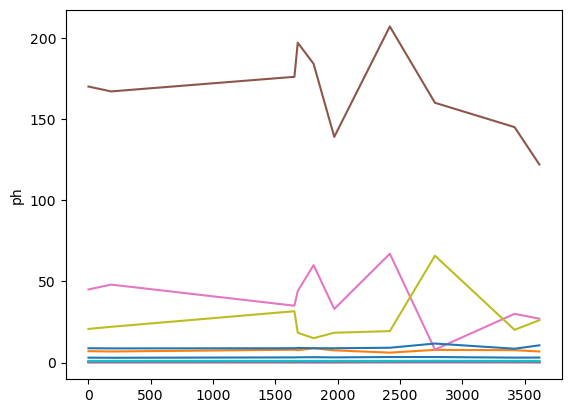

In [97]:
for input in all_inputs:
    sns.lineplot(high_density_wines_w[input])

## Residual Sugar

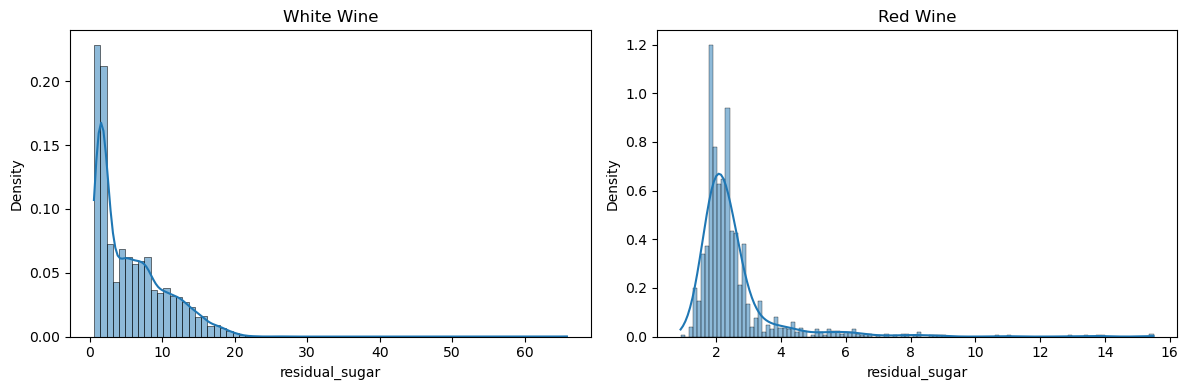

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(wine_w, x='residual_sugar', stat='density', kde=True, ax=ax[0])
sns.histplot(wine_r, x='residual_sugar', stat='density', kde=True, ax=ax[1])

ax[0].set_title('White Wine')

ax[1].set_title('Red Wine')

plt.tight_layout()

- The distribution of Residual Sugar is wider in white wines; the distribution is quite narrow in red wines.
- Red wines have a maximum around 2

## Alcohol

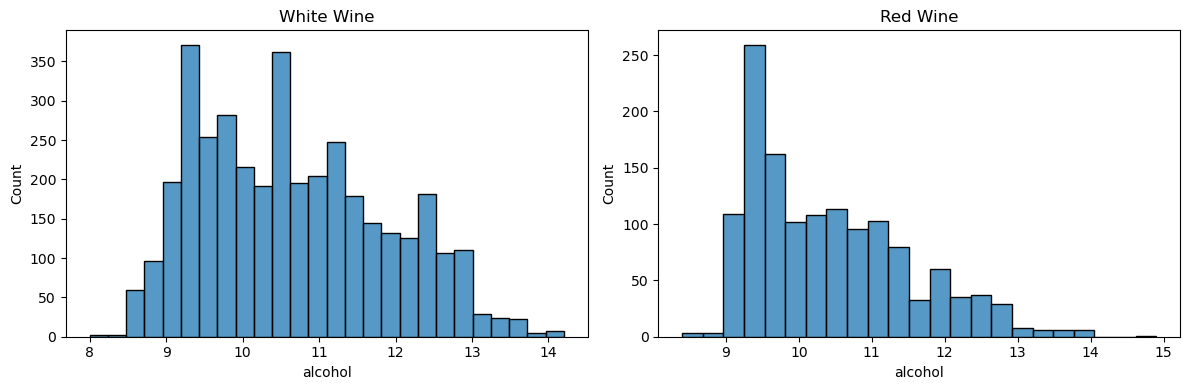

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(wine_w, x='alcohol', ax=ax[0])
sns.histplot(wine_r, x='alcohol', ax=ax[1])

ax[0].set_title('White Wine')

ax[1].set_title('Red Wine')

plt.tight_layout()

## Density vs. Sulphates

<Axes: xlabel='sulphates', ylabel='density'>

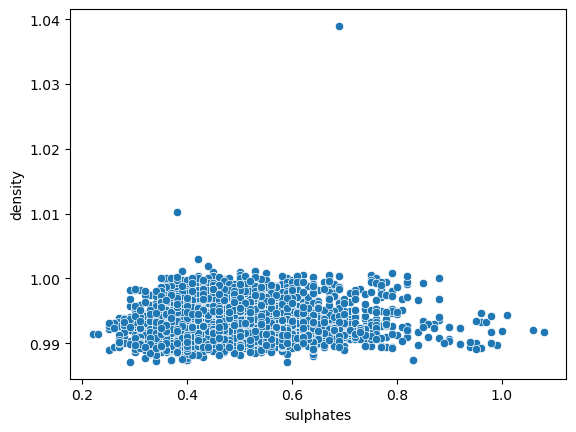

In [100]:
sns.scatterplot(wine_w, y='density', x='sulphates')

## Density vs. Residual Sugar

(0.99, 1.005)

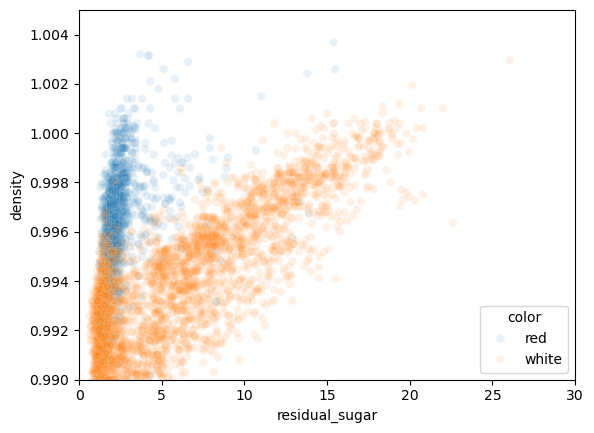

In [101]:
ax = sns.scatterplot(wine, y='density', x='residual_sugar', 
                     hue='color', alpha=0.1
                     )

ax.set_xlim([0, 30])
ax.set_ylim([0.99, 1.005])

(0.98, 1.005)

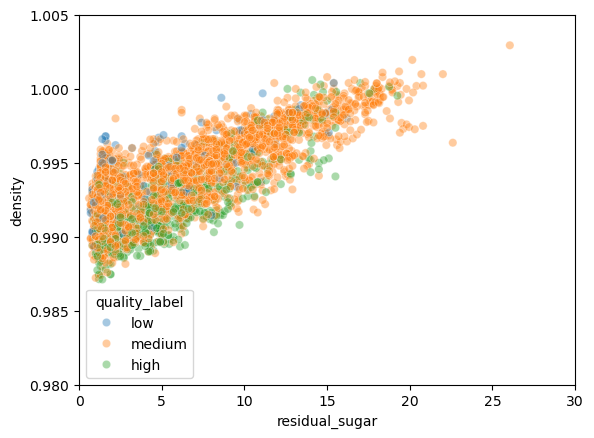

In [102]:
ax = sns.scatterplot(wine_w, y='density', x='residual_sugar', hue='quality_label', alpha=0.4)

ax.set_xlim([0, 30])
ax.set_ylim([0.98, 1.005])

<Axes: xlabel='total_sulfur_dioxide', ylabel='density'>

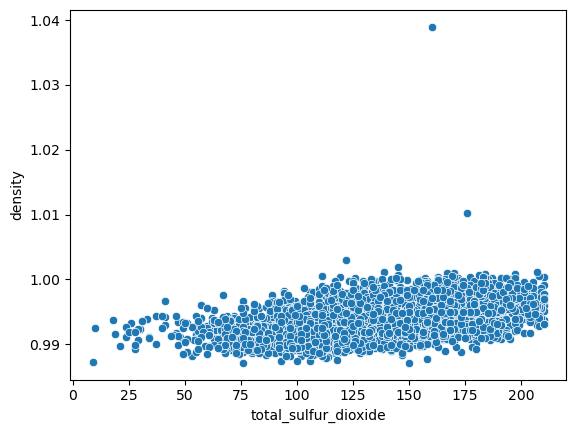

In [103]:
sns.scatterplot(wine_w, y='density', x='total_sulfur_dioxide')

<Axes: xlabel='total_sulfur_dioxide', ylabel='residual_sugar'>

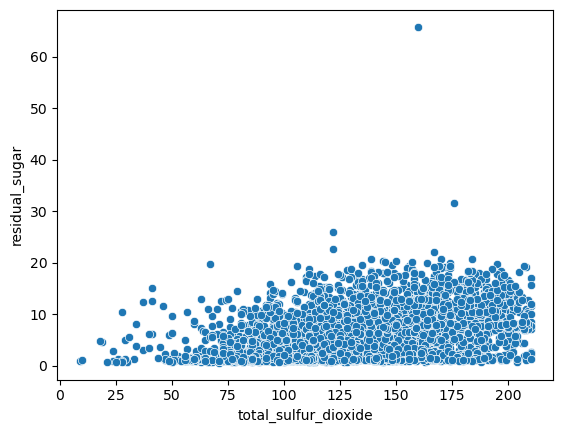

In [104]:
sns.scatterplot(wine_w, y='residual_sugar', x='total_sulfur_dioxide')